In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
pd.options.display.max_columns = 500

In [4]:
data_info = pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')

In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [9]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


In [10]:
target = 'loan_status'

<Axes: xlabel='loan_status', ylabel='count'>

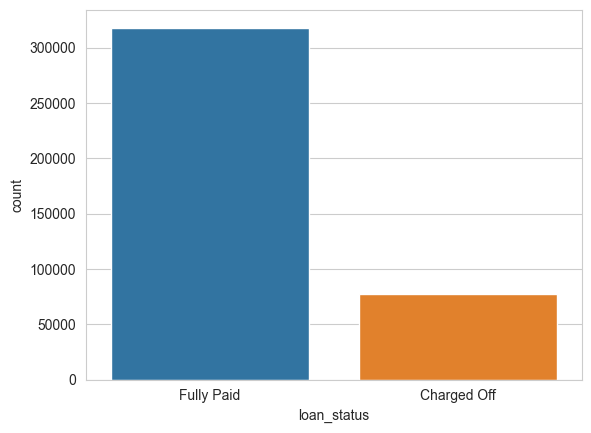

In [11]:
sns.countplot(x=df[target])

<Axes: xlabel='loan_amnt', ylabel='Count'>

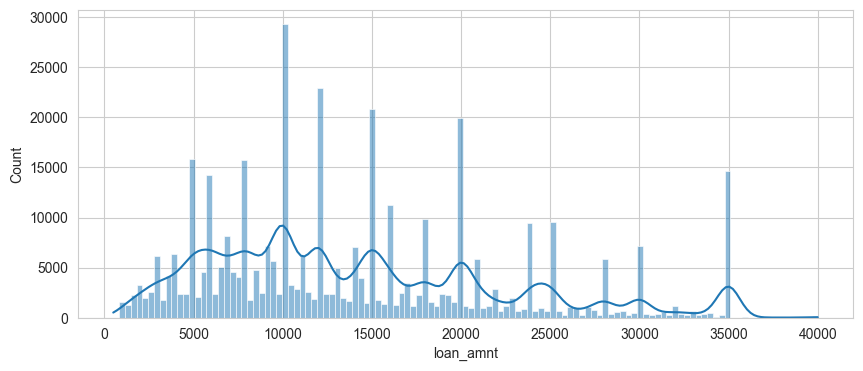

In [12]:
plt.figure(figsize=(10,4))
sns.histplot(df['loan_amnt'],kde=True)

In [13]:
df[target] = df[target].map({'Fully Paid':1,'Charged Off':0})

In [14]:
df.corr(numeric_only=True)[target].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_status             1.000000
Name: loan_status, dtype: float64

<Axes: >

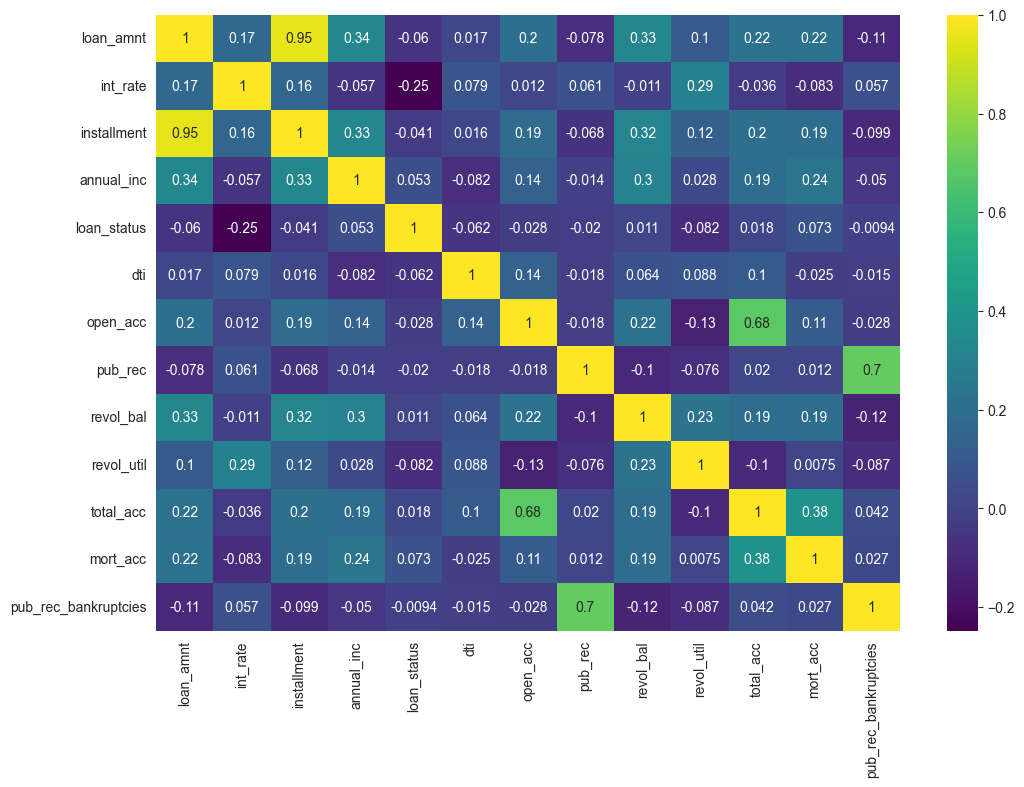

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

<Axes: xlabel='loan_amnt', ylabel='installment'>

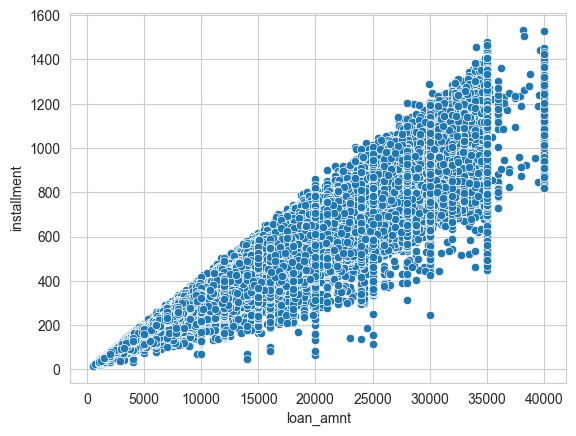

In [16]:
sns.scatterplot(data=df,x='loan_amnt',y='installment')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

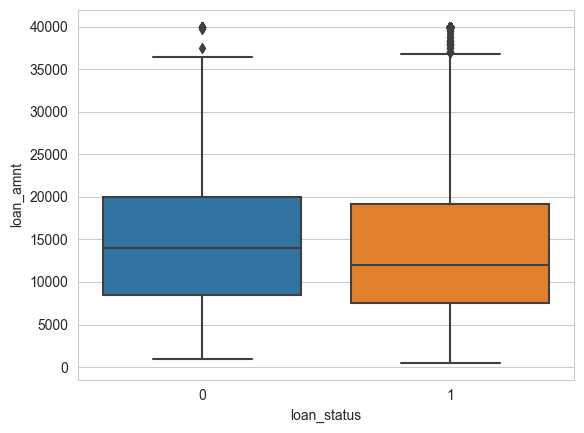

In [17]:
sns.boxplot(data=df,x=target,y='loan_amnt')

In [18]:
df.groupby(target).describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
1,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [19]:
df['grade'].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [20]:
df['sub_grade'].value_counts()

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

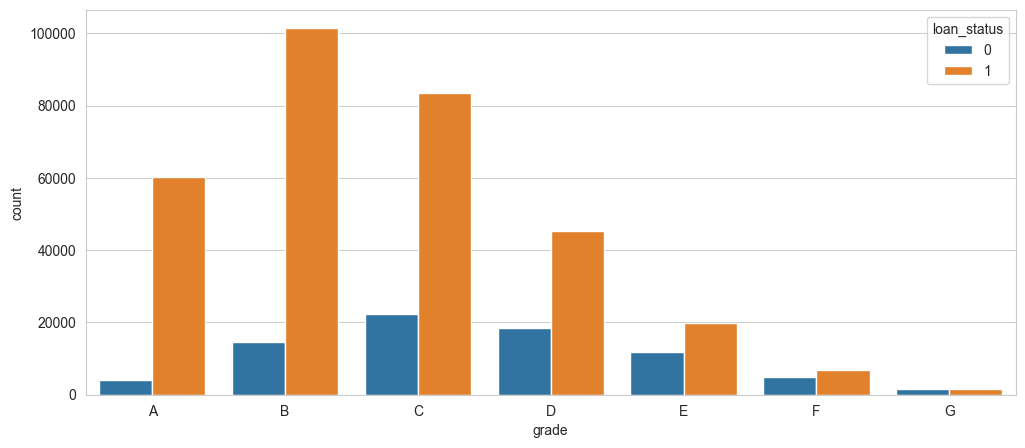

In [21]:
plt.figure(figsize=(12,5))
order_grade = ['A','B','C','D','E','F','G']
sns.countplot(data=df,x='grade',hue=target,order = order_grade)

<Axes: xlabel='sub_grade', ylabel='count'>

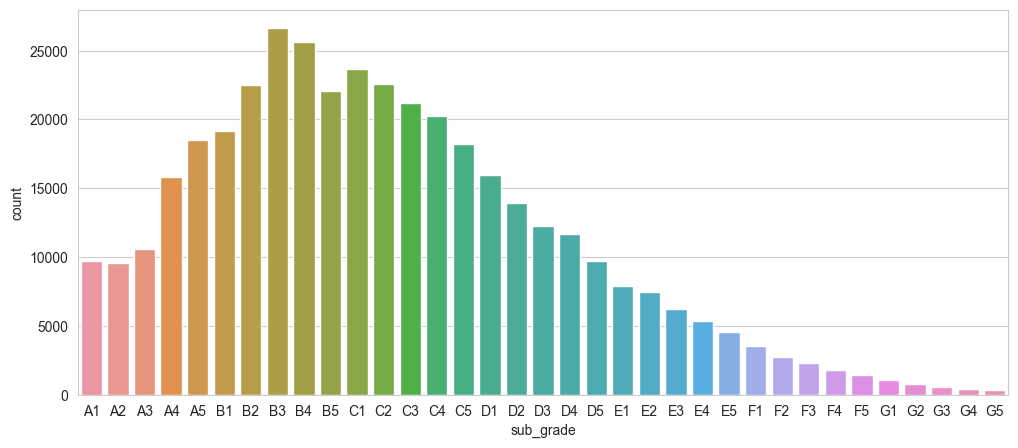

In [22]:
plt.figure(figsize=(12,5))
order_sub_grade = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5',
                  'C1','C2','C3','C4','C5','D1','D2','D3','D4','D5',
                  'E1','E2','E3','E4','E5','F1','F2','F3','F4','F5',
                  'G1','G2','G3','G4','G5',]
sns.countplot(data=df,x='sub_grade',order=order_sub_grade)

<Axes: xlabel='sub_grade', ylabel='count'>

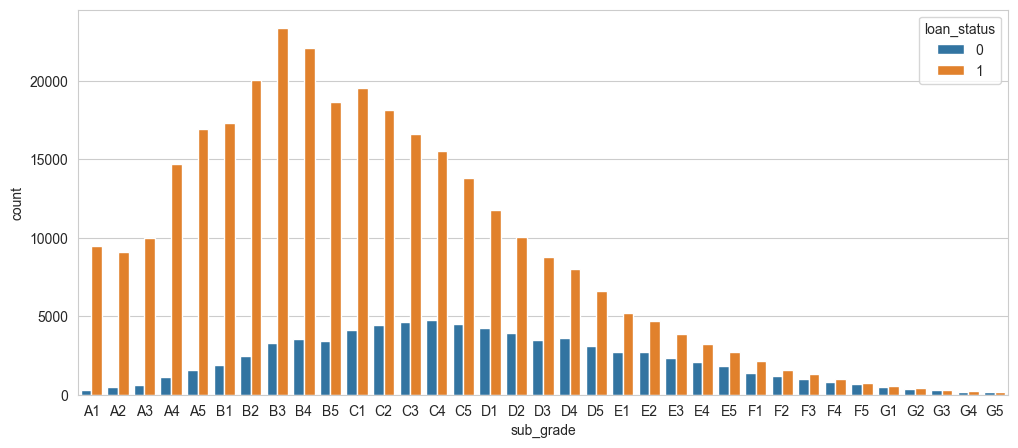

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='sub_grade',order=order_sub_grade,hue=target)

<Axes: >

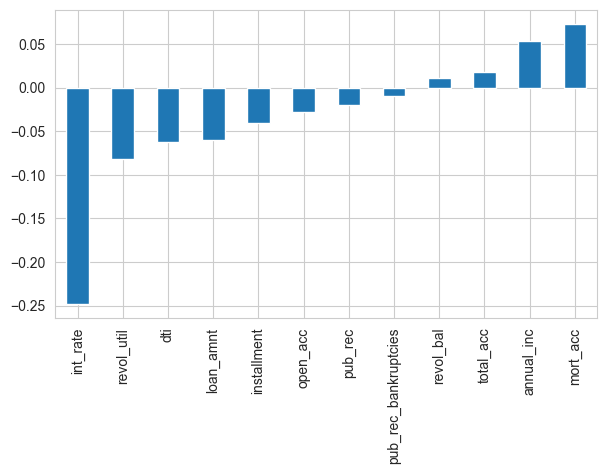

In [24]:
df.corr(numeric_only=True)[target].sort_values()[:-1].plot(kind='bar',figsize=(7,4))

<Axes: >

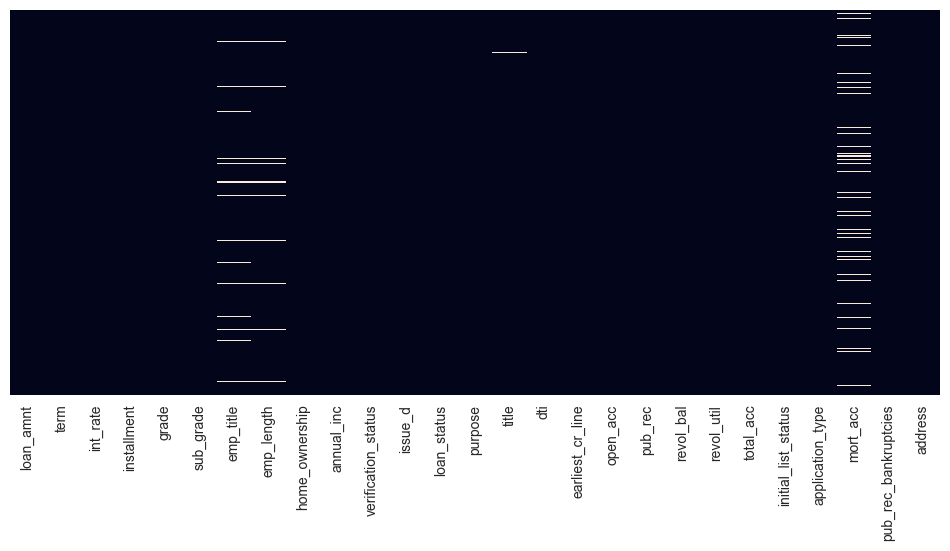

In [25]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [26]:
df.isnull().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

In [27]:
feat_info('mort_acc')

Number of mortgage accounts.


In [28]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [29]:
df['mort_acc'].fillna(0,inplace=True)

In [30]:
df.isnull().sum().sort_values(ascending=False)

emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
mort_acc                    0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

In [31]:
df.shape

(396030, 27)

In [32]:
df.drop('emp_title',axis=1,inplace=True)

In [33]:
df.isnull().sum().sort_values(ascending=False)

emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
dti                         0
mort_acc                    0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
loan_amnt                   0
term                        0
purpose                     0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

In [34]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [35]:
df['emp_length'] = df['emp_length'].map({'10+ years':15,'4 years':4,'< 1 year':0.5,'6 years':6,'9 years':9,'2 years':2
                                        ,'3 years':3,'8 years':8,'7 years':7,'5 years':5,'1 year':1})

In [36]:
df['emp_length'].fillna(0,inplace=True)

In [37]:
df.isnull().sum().sort_values(ascending=False)

title                   1756
pub_rec_bankruptcies     535
revol_util               276
term                       0
mort_acc                   0
application_type           0
initial_list_status        0
total_acc                  0
revol_bal                  0
pub_rec                    0
open_acc                   0
earliest_cr_line           0
dti                        0
loan_amnt                  0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
annual_inc                 0
home_ownership             0
emp_length                 0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
address                    0
dtype: int64

In [38]:
df['title'].unique().shape

(48817,)

In [39]:
df.drop('title',axis=1,inplace=True)

In [40]:
df.isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies    535
revol_util              276
loan_amnt                 0
dti                       0
mort_acc                  0
application_type          0
initial_list_status       0
total_acc                 0
revol_bal                 0
pub_rec                   0
open_acc                  0
earliest_cr_line          0
purpose                   0
term                      0
loan_status               0
issue_d                   0
verification_status       0
annual_inc                0
home_ownership            0
emp_length                0
sub_grade                 0
grade                     0
installment               0
int_rate                  0
address                   0
dtype: int64

In [41]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [42]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [43]:
df['pub_rec_bankruptcies'].fillna(0,inplace=True)

In [44]:
df.isnull().sum().sort_values(ascending=False)

revol_util              276
loan_amnt                 0
dti                       0
pub_rec_bankruptcies      0
mort_acc                  0
application_type          0
initial_list_status       0
total_acc                 0
revol_bal                 0
pub_rec                   0
open_acc                  0
earliest_cr_line          0
purpose                   0
term                      0
loan_status               0
issue_d                   0
verification_status       0
annual_inc                0
home_ownership            0
emp_length                0
sub_grade                 0
grade                     0
installment               0
int_rate                  0
address                   0
dtype: int64

In [45]:
df['revol_util']

0         41.8
1         53.3
2         92.2
3         21.5
4         69.8
          ... 
396025    34.3
396026    95.7
396027    66.9
396028    53.8
396029    91.3
Name: revol_util, Length: 396030, dtype: float64

In [46]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [47]:
df[df['revol_util'].isnull()].head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
1686,2150.0,36 months,11.14,70.54,B,B2,0.5,MORTGAGE,50000.0,Source Verified,Apr-2013,1,credit_card,6.74,Nov-1996,2.0,0.0,0.0,NaN,21.0,w,INDIVIDUAL,3.0,0.0,"77373 Mendoza Causeway Suite 785\nGibsonhaven,..."
3019,5000.0,36 months,13.79,170.38,C,C5,0.5,RENT,45000.0,Source Verified,Jan-2009,1,other,6.00,Jul-1994,8.0,0.0,0.0,NaN,11.0,f,INDIVIDUAL,0.0,0.0,"555 Smith Meadows Apt. 429\nBryanfurt, TN 05113"
4931,8000.0,36 months,13.67,272.15,B,B5,2.0,RENT,30000.0,Source Verified,Dec-2013,1,debt_consolidation,21.60,Nov-2002,2.0,0.0,0.0,NaN,15.0,w,INDIVIDUAL,0.0,0.0,"PSC 6735, Box 8380\nAPO AE 30723"


In [48]:
df['revol_util'].fillna(0,inplace=True)

<Axes: >

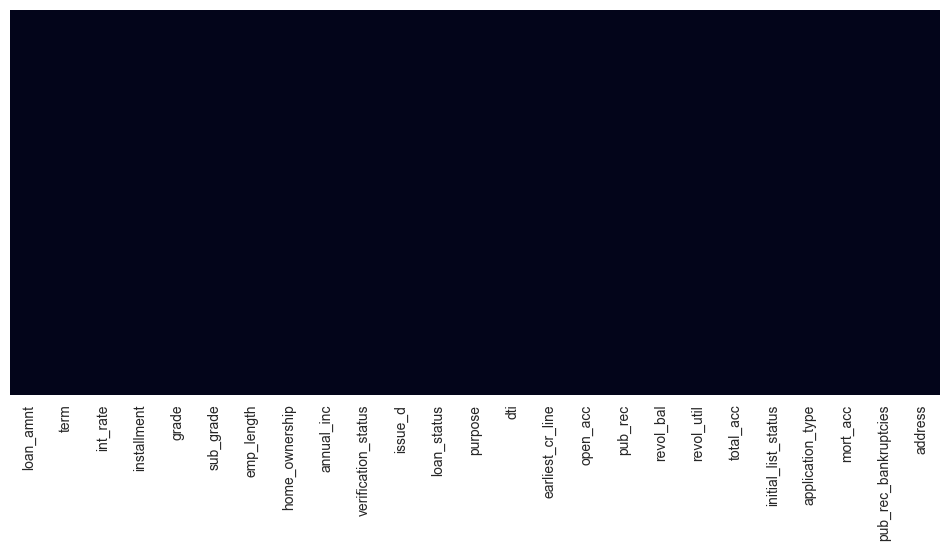

In [49]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  float64
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  int64  
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [51]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [52]:
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})

In [53]:
df.select_dtypes(include=['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [54]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [55]:
df = pd.get_dummies(df,columns=['grade'],drop_first=True)

In [56]:
df.select_dtypes(include=['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [57]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [58]:
df = pd.get_dummies(df,columns=['sub_grade'],drop_first=True)

In [59]:
df.select_dtypes(include=['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [60]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [61]:
df = pd.get_dummies(df,columns=['home_ownership'],drop_first=True)

In [62]:
df.select_dtypes(include=['object']).columns

Index(['verification_status', 'issue_d', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [63]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [64]:
df['verification_status'] = df['verification_status'].map({'Not Verified':0,'Source Verified':1,'Verified':1})

In [65]:
df.select_dtypes(include=['object']).columns

Index(['issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [66]:
df['issue_year'] = df['issue_d'].apply(lambda x: int(x[-4:]))

In [67]:
df.drop('issue_d',axis=1,inplace=True)

In [68]:
df.select_dtypes(include=['object']).columns

Index(['purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [69]:
df.drop('address',axis=1,inplace=True)

In [70]:
df.select_dtypes(include=['object']).columns

Index(['purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type'],
      dtype='object')

In [71]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [72]:
df = pd.get_dummies(df,columns=['purpose'],drop_first=True)

In [73]:
df.select_dtypes(include=['object']).columns

Index(['earliest_cr_line', 'initial_list_status', 'application_type'], dtype='object')

In [74]:
df['earliest_cr_line'].unique()

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

In [75]:
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [76]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [77]:
df.select_dtypes(include=['object']).columns

Index(['initial_list_status', 'application_type'], dtype='object')

In [78]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [79]:
df['initial_list_status'] = df['initial_list_status'].map({'w':0,'f':1})

In [80]:
df.select_dtypes(include=['object']).columns

Index(['application_type'], dtype='object')

In [81]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [82]:
df = pd.get_dummies(df,columns=['application_type'],drop_first=True)

In [83]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    396030 non-null  float64
 1   term                         396030 non-null  int64  
 2   int_rate                     396030 non-null  float64
 3   installment                  396030 non-null  float64
 4   emp_length                   396030 non-null  float64
 5   annual_inc                   396030 non-null  float64
 6   verification_status          396030 non-null  int64  
 7   loan_status                  396030 non-null  int64  
 8   dti                          396030 non-null  float64
 9   open_acc                     396030 non-null  float64
 10  pub_rec                      396030 non-null  float64
 11  revol_bal                    396030 non-null  float64
 12  revol_util                   396030 non-null  float64
 13 

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X = df.drop(target,axis=1)
y = df[target]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()

In [91]:
X_train = scaler.fit_transform(X_train)

In [92]:
X_test = scaler.transform(X_test)

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [94]:
df.shape

(396030, 79)

In [95]:
model = Sequential()

model.add(Dense(79,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(40,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [96]:
model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=256)

Epoch 1/25
1083/1083 [==============================] - 5s 4ms/step - loss: 0.4702 - val_loss: 0.4557
Epoch 2/25
1083/1083 [==============================] - 4s 4ms/step - loss: 0.4601 - val_loss: 0.4556
Epoch 3/25
1083/1083 [==============================] - 4s 4ms/step - loss: 0.4575 - val_loss: 0.4543
Epoch 4/25
1083/1083 [==============================] - 4s 4ms/step - loss: 0.4561 - val_loss: 0.4537
Epoch 5/25
1083/1083 [==============================] - 4s 4ms/step - loss: 0.4547 - val_loss: 0.4532
Epoch 6/25
1083/1083 [==============================] - 4s 4ms/step - loss: 0.4539 - val_loss: 0.4520
Epoch 7/25
1083/1083 [==============================] - 5s 4ms/step - loss: 0.4532 - val_loss: 0.4517
Epoch 8/25
1083/1083 [==============================] - 5s 4ms/step - loss: 0.4522 - val_loss: 0.4512
Epoch 9/25
1083/1083 [==============================] - 4s 4ms/step - loss: 0.4517 - val_loss: 0.4509
Epoch 10/25
1083/1083 [==============================] - 4s 4ms/step - loss: 0.451

In [97]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

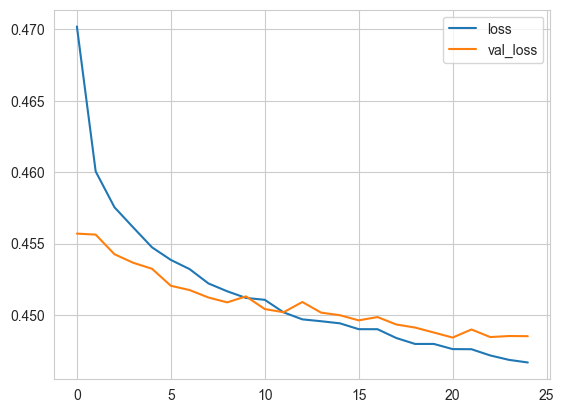

In [98]:
model_loss.plot()

In [99]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3713/3713 [==============================] - 5s 1ms/step


In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test,predictions))

[[ 1421 21839]
 [ 1178 94371]]

              precision    recall  f1-score   support

           0       0.55      0.06      0.11     23260
           1       0.81      0.99      0.89     95549

    accuracy                           0.81    118809
   macro avg       0.68      0.52      0.50    118809
weighted avg       0.76      0.81      0.74    118809

